In [13]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
from collections import defaultdict
import matplotlib.pyplot as plt

import json

from kocherga.db import Session
from kocherga.supplies.cookies import CookiePick

In [14]:
cookie_picks = Session().query(CookiePick).all()

In [15]:
data = [{'cookie_id': p.cookie_id, 'against_id': p.against_id, 'user': p.user} for p in cookie_picks]

In [16]:
data[:3]

[{'cookie_id': 'bd6f086a79139b25cef334e0a5c13004',
  'against_id': 'b7ada15065606b2791be871b1062e4a7',
  'user': '0.878850851459301'},
 {'cookie_id': '7f0d8c82f53e68180886bd4e8120f2a9',
  'against_id': 'bc02174bd08edbf8c5b89877f60933e3',
  'user': '0.878850851459301'},
 {'cookie_id': '5d5e3af0eb5a9504d3a84390d85d0c09',
  'against_id': 'c8cf929ec11ed23403ab6558eec7b2db',
  'user': '0.878850851459301'}]

In [18]:
cookies = defaultdict(lambda: len(cookies)) # https://wchargin.github.io/posts/a-cute-autoincrementing-id-table-in-one-line-of-python/
votes = defaultdict(list)

In [53]:
for vote in data:
    if vote['cookie_id'] == '' or vote['against_id'] == '':
        continue
    votes[vote['user']].append((cookies[vote['cookie_id']], cookies[vote['against_id']]))

In [30]:
def weights_all(v, a):
    weights = np.array([1.0] * len(a))
    for win, loss in v:
        good = a[:, win] > a[:, loss]
        weights[good] *= 0.9
        weights[~good] *= 0.1
    return weights

In [32]:
kkk = [k for k in votes if votes[k] == vvv][0]

In [40]:
def get_marks(seed, n):
    #return np.random.uniform(size=(len(votes), 56))
    vvotes = {kkk: votes[kkk]}
    marks = np.zeros((len(vvotes), 56))
    np.random.seed(seed)
    a = np.random.uniform(size=(n, 56))

    for i, (k, vvv) in tqdm_notebook(enumerate(vvotes.items()), total=len(votes)):
        weights = weights_all(vvv, a)
        q = (a * np.repeat(weights.reshape((-1, 1)), a.shape[1], axis=1)).sum(axis=0) / weights.sum()
        marks[i] = q
    return marks


bad 0 0.03433477482902786 0.03433477482902786


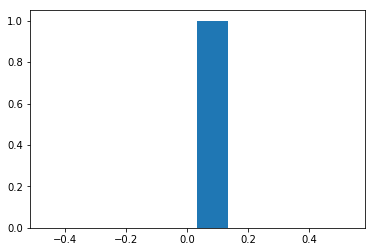

In [38]:
for n in [100000]: #[1000, 10000, 100000, 1000000]:
    marks1 = get_marks(42 + n, n)
    marks2 = get_marks(43 + n, n)
    #diff = (np.abs(marks1 - marks2) / (marks1 + marks2)).mean(axis=1)
    diff = (np.abs(marks1 - marks2)).max(axis=1)
    print("bad", np.isnan(diff).sum(), diff[np.isfinite(diff)].max(), diff[np.isfinite(diff)].mean())
    plt.hist(diff[np.isfinite(diff)])
    plt.show()

(array([  9.,  11.,  15.,  19.,  22.,  29.,  34.,  47.,  51.,  54.,  65.,
         75.,  80.,  86.,  94.,  95.,  98., 101., 106., 108., 112., 119.,
        121., 123., 128., 129., 129., 131., 137., 137., 138., 140., 144.,
        146., 148., 149., 151., 151., 155., 159., 160., 161., 162., 164.,
        164., 166., 167., 167., 169., 171.]),
 array([  3.  ,   6.84,  10.68,  14.52,  18.36,  22.2 ,  26.04,  29.88,
         33.72,  37.56,  41.4 ,  45.24,  49.08,  52.92,  56.76,  60.6 ,
         64.44,  68.28,  72.12,  75.96,  79.8 ,  83.64,  87.48,  91.32,
         95.16,  99.  , 102.84, 106.68, 110.52, 114.36, 118.2 , 122.04,
        125.88, 129.72, 133.56, 137.4 , 141.24, 145.08, 148.92, 152.76,
        156.6 , 160.44, 164.28, 168.12, 171.96, 175.8 , 179.64, 183.48,
        187.32, 191.16, 195.  ]),
 <a list of 50 Patch objects>)

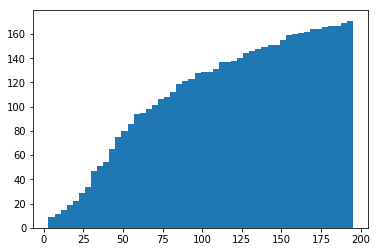

In [42]:
vc = np.array([len(v) for v in votes.values()])
plt.hist(vc[vc < 200], bins=50, cumulative=True)

In [43]:
vvv = votes['0.878850851459301']

In [44]:
vvv

[(0, 1),
 (2, 3),
 (4, 5),
 (6, 5),
 (28, 14),
 (39, 31),
 (25, 37),
 (30, 16),
 (0, 1),
 (2, 3),
 (4, 5),
 (6, 5),
 (28, 14),
 (39, 31),
 (25, 37),
 (30, 16),
 (0, 1),
 (2, 3),
 (4, 5),
 (6, 5),
 (28, 14),
 (39, 31),
 (25, 37),
 (30, 16)]

In [45]:
import itertools

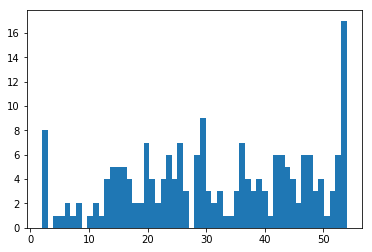

In [56]:
# количество людей, которые видели данное число печенек
plt.hist([len(set(itertools.chain([x for x, _ in vvv], [x for _, x in vvv]))) for vvv in votes.values()], bins=len(cookies))
plt.show()

In [48]:
def update_weight(w, v, lr=0.1):
    x = w[v[0]] - w[v[1]]
    d = 1.0 - np.exp(x - 1)
    w[v[0]] = min(w[v[0]] + d * lr, 1.0)
    w[v[1]] = max(w[v[1]] - d * lr, 0.0)

In [50]:
# vvv = [v for v in votes.values() if len(v) == 10][0]

In [51]:
import random

In [59]:
#vvv = votes.values().__iter__().__next__() #[(0, 1), (1, 2), (0, 3)]
marks = np.zeros((len(votes), len(cookies)))
votes_num = []
for i, vvv in tqdm_notebook(enumerate(votes.values()), total=len(votes)):
    votes_num.append(len(vvv))
    #continue
    m = len(cookies) #max(max(x, y) for x, y in vvv)
    vvv = vvv[:]
    vvv += [(i, m) for i in range(m)]
    vvv += [(m + 1, i) for i in range(m)]

    w = [0.5] * (m + 2)
    for _ in range(500):
        random.shuffle(vvv)
        for v in vvv:
            update_weight(w, v, lr=0.02)
            w[m] = 0.0
            w[m + 1] = 1.0
    marks[i] = w[:len(cookies)]
    #print(' '.join('%d-%.2f' % (i, x, ) for i, x in enumerate(w[:-2]) if abs(x - 0.5) > 1e-5))

In [62]:
[k for k, v in cookies.items() if (marks > 0.6).mean(axis = 0)[v] > 0.35]

['c8cf929ec11ed23403ab6558eec7b2db',
 'd0c5f601726f94b011f2b386cf122afd',
 '5c84eb5c22a1ef8e8899c062e07238c4',
 'cd9519a07dcbab06daed0949c8c59d72',
 'cc98f134d8e047f989b7fa9f9373aaa7']

In [74]:
from IPython.display import Image, display
for cookie_id in [k for k, v in cookies.items() if (marks > 0.6).mean(axis = 0)[v] > 0.35]:
    display(Image(url=f'https://cookies.kocherga.club/images/{cookie_id}', width=150, height=150))

In [75]:
pos_learn = {}
for i, (k, _) in enumerate(sorted([(k, marks[:, v].mean()) for k, v in cookies.items()], key=lambda x: -x[1])):
    pos_learn[k] = i

In [79]:
pos_naive = {}
for i, (k, _) in enumerate(sorted([(k, rating[v]) for k, v in cookies.items()], key=lambda x: -x[1])):
    pos_naive[k] = i

In [80]:
qqq = np.array([[pos_learn[k], pos_naive[k]] for k in pos_learn])

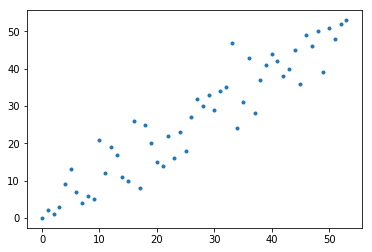

In [81]:
plt.plot(qqq[:, 0], qqq[:, 1], '.')

In [82]:
votes_pos = defaultdict(int)
votes_neg = defaultdict(int)
for vvv in votes.values():
    for w, l in vvv:
        votes_pos[w] += 1
        votes_neg[l] += 1

In [85]:
rating = {k: (votes_pos[k] - votes_neg[k]) / ((votes_pos[k] + votes_neg[k]) or 1) for k in range(55)}

In [89]:
for (k, r) in sorted([(k, marks[:, v].mean()) for k, v in cookies.items()], key=lambda x: -x[1])[:10]:
    display(Image(url=f'https://cookies.kocherga.club/images/{k}',width=100,height=100))